In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 25/100 completed
Step 50/100 completed
Step 75/100 completed
Step 100/100 completed
Simulation completed: 100 steps


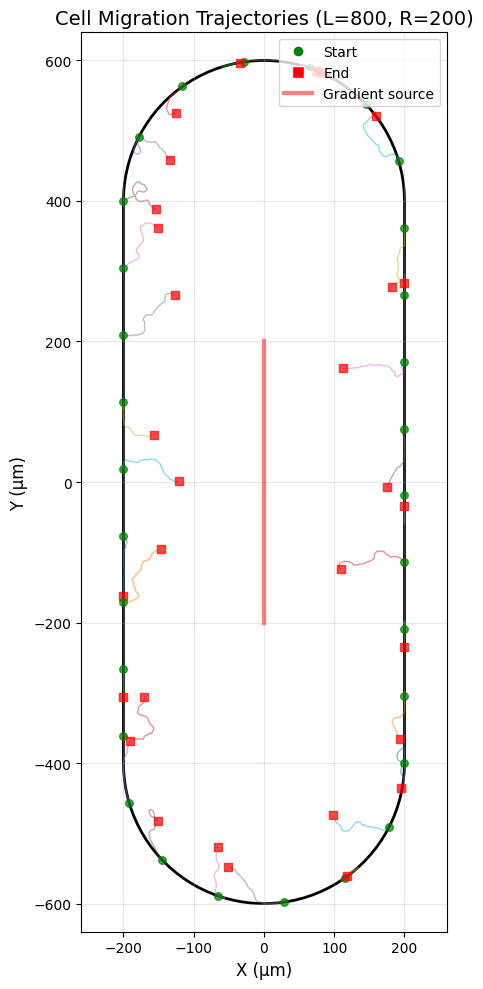

(<Figure size 600x1000 with 1 Axes>,
 <Axes: title={'center': 'Cell Migration Trajectories (L=800, R=200)'}, xlabel='X (μm)', ylabel='Y (μm)'>)

In [ ]:
from simulation import Simulation
from visualization import plot_trajectories, create_animation, plot_cell_statistics
from analysis import calculate_dacf, calculate_msd


# Create simulation with proper stadium parameters
sim = Simulation(
    n_cells=30,
    stadium_L=800,          # Length of straight walls
    stadium_R=200,          # Radius of semicircles
    source_length=400,      # Length of gradient line source
    chemotaxis_strength=-0.3,
    repulsion_strength=0.2,
    initial_distribution='perimeter'
)

# Run simulation
sim.run(n_steps=100)

# Visualize
plot_trajectories(sim)

In [13]:
from markov import MarkovChain
from simulation import Simulation
import pandas as pd

# Load data
data = pd.read_csv(r'D:\David\endoderm_migration\raw_data\220125_2DFACS_FOXA2positive_lateday2\tracks_df_220125_2DFACS_FOXA2positive_lateday2.csv')
data = data[['track_id', 'normalized_time', 'x_microns', 'y_microns']]
data = data.rename(columns={'normalized_time': 'step', 'x_microns': 'x', 'y_microns': 'y'})
data['dx'] = data.groupby('track_id')['x'].diff()
data['dy'] = data.groupby('track_id')['y'].diff()
data['theta'] = np.arctan2(data['dy'], data['dx'])
data['dt'] = 10
data['v_x'] = data['dx'] / data['dt']
data['v_y'] = data['dy'] / data['dt']
data['velocity'] = np.sqrt(data['dx']**2 + data['dy']**2)/data['dt']
data['velocity'] = data['velocity'].replace([np.inf, -np.inf], np.nan)



tracks = [group[['x', 'y']].values 
          for _, group in data.groupby('track_id')]

# Fit Markov chain
mc = MarkovChain()
mc.fit(tracks, B=12, n=3)

# Run simulation with fitted model
sim = Simulation(markov_chain=mc, initial_distribution='perimeter', stadium_L=80, stadium_R=20, source_length=40, chemotaxis_strength=-0.3, repulsion_strength=0.2, interaction_radius=2.0)
sim.run(n_steps=100)

Markov chain fitted: 1728 states from 33967 tracks
Step 25/100 completed
Step 50/100 completed
Step 75/100 completed
Step 100/100 completed
Simulation completed: 100 steps


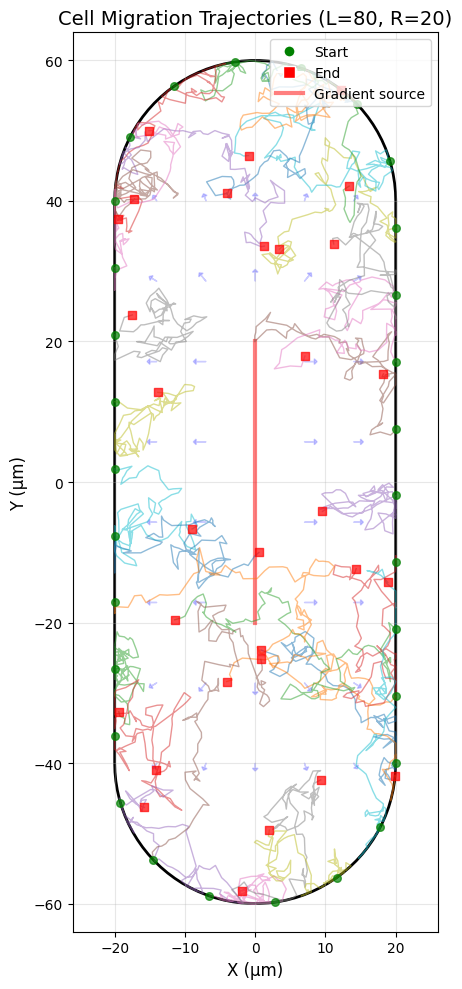

d:\David\endoderm_migration\cell_migration_simulation\MCmigrate_simple\MCmigrate\analysis.py:47: RuntimeWarning: Mean of empty slice
  acorr_vals[dt] = np.nanmean(dot)


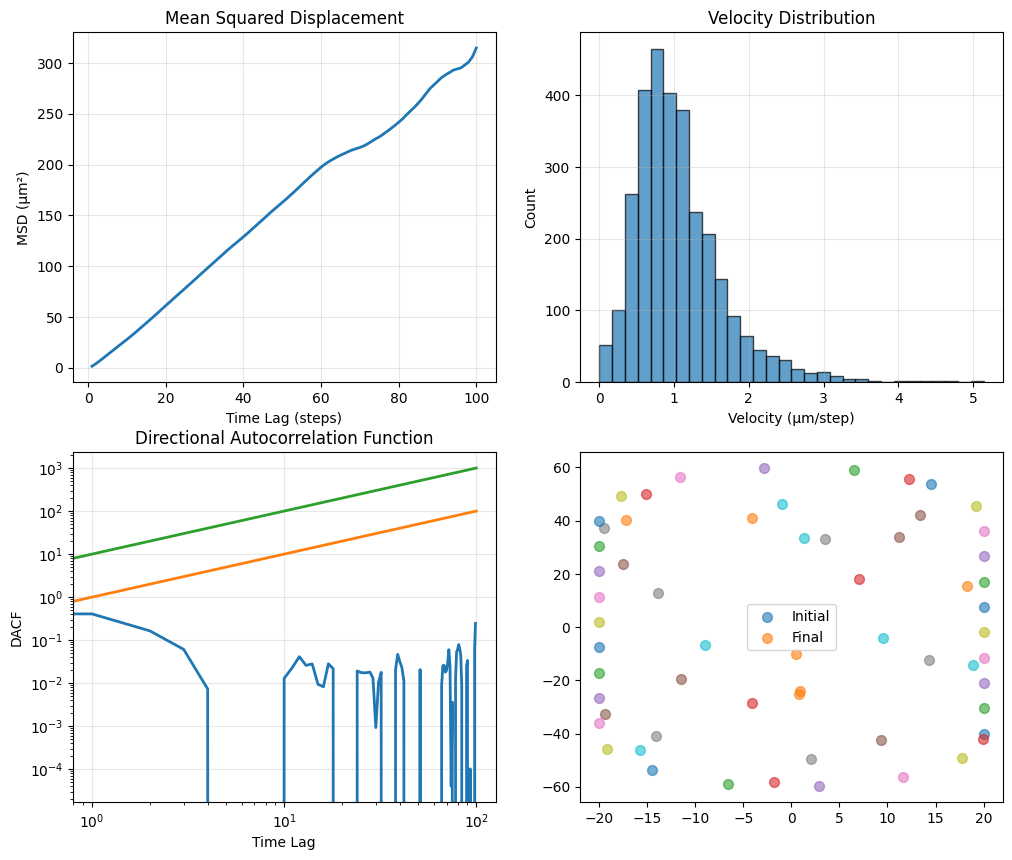

In [6]:
from visualization import plot_trajectories, create_animation, plot_cell_statistics

# Plot trajectories
plot_trajectories(sim, show_gradient=True)

# # Create animation
# anim = create_animation(sim, save_path='migration.gif')

# Plot statistics
plot_cell_statistics(sim)

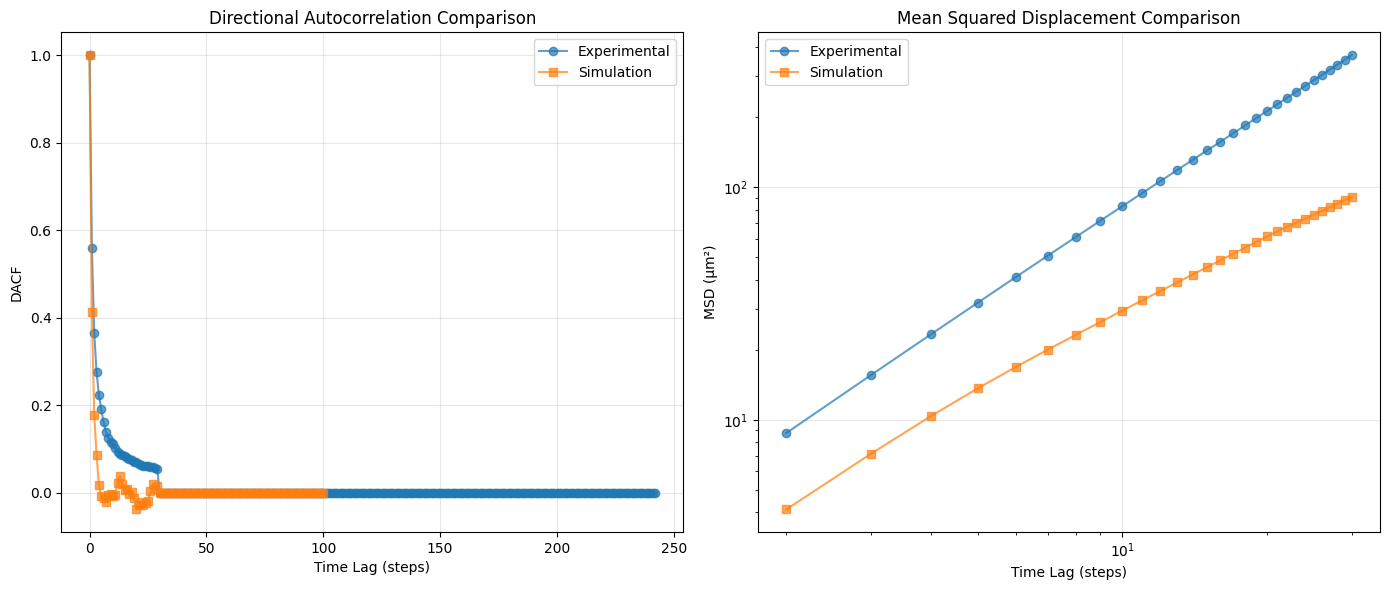

{'sim_dacf':               dacf  lag    dt
 0     1.000000e+00    0     0
 1     4.134398e-01    1    10
 2     1.782099e-01    2    20
 3     8.653429e-02    3    30
 4     1.769495e-02    4    40
 ..             ...  ...   ...
 96   4.743030e-322   96   960
 97   4.792437e-322   97   970
 98   4.841843e-322   98   980
 99   4.891250e-322   99   990
 100  4.940656e-322  100  1000
 
 [101 rows x 3 columns],
 'sim_msd':           msd  lag   dt
 0    1.532793    1   10
 1    4.114341    2   20
 2    7.141059    3   30
 3   10.378645    4   40
 4   13.645427    5   50
 5   16.860424    6   60
 6   20.049334    7   70
 7   23.182261    8   80
 8   26.322706    9   90
 9   29.504433   10  100
 10  32.670442   11  110
 11  35.816445   12  120
 12  38.980413   13  130
 13  42.141580   14  140
 14  45.342037   15  150
 15  48.545999   16  160
 16  51.772575   17  170
 17  55.014096   18  180
 18  58.281396   19  190
 19  61.477308   20  200
 20  64.635504   21  210
 21  67.649307   22  220
 22

In [14]:
# compare simulation results with experimental data
from analysis import compare_simulations

sim_df = sim.get_dataframe()

compare_simulations(sim_df, data)

In [10]:
sim_df

,track_id,step,x,y,v_x,v_y
0,0,0,20.000000,-40.000000,0.000000,0.000000
1,0,1,19.242245,-40.003251,-0.757755,-0.003251
2,0,2,18.883103,-39.846264,-0.359142,0.156987
3,0,3,18.340478,-39.217738,-0.542624,0.628526
4,0,4,17.911084,-40.289887,-0.429395,-1.072149
...,...,...,...,...,...,...
3025,29,96,16.751681,-12.830215,-0.651859,0.199875
3026,29,97,15.906246,-12.605672,-0.845435,0.224543
3027,29,98,17.065563,-12.849502,1.159317,-0.243830
3028,29,99,17.944705,-13.319188,0.879143,-0.469686
